In [59]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

housing_df = pd.read_csv('housing.csv')


In [60]:
# explore the dataset
display(housing_df.head())
housing_df.shape
housing_df.info()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [61]:
#check for missing values
missing_values = housing_df.isnull().sum()
missing_values[missing_values > 0]

total_bedrooms    207
dtype: int64

In [62]:
# Clean the dataset by dropping rows with missing values
cleaned_df = housing_df.dropna()
print("Number of rows before cleaning:", housing_df.shape[0])
print("Number of rows after cleaning:", cleaned_df.shape[0])

Number of rows before cleaning: 20640
Number of rows after cleaning: 20433


In [63]:
# we set up variables to calculate the monthly minimum wage for 2025
min_wage_per_hour = 16.50
min_wage_per_month = min_wage_per_hour * 40 * 4.33  # Assuming 40 hours a week and 4 weeks a month
print(f"Monthly minimum wage for 2025: ${min_wage_per_month:.2f}")

Monthly minimum wage for 2025: $2857.80


In [64]:
# we then calculate what is considered affordable housing
# housing is considered affordable if it costs no more than 30% of a person's income
affordable_housing_threshold = min_wage_per_month * 0.30
print(f"Affordable housing threshold (30% of monthly minimum wage): ${affordable_housing_threshold:.2f}")


Affordable housing threshold (30% of monthly minimum wage): $857.34


In [65]:
#converting house values to rental prices
#industry standard is to divide the house value by 200 to get the estimated monthly rent
housing_df['estimated_monthly_rent'] = housing_df['median_house_value'] / 200 * 2.2 # # Adjusting for inflation to 2025

print(f"Average estimated monthly rent: ${housing_df['estimated_monthly_rent'].mean():.2f}")
print(f"Median estimated monthly rent: ${housing_df['estimated_monthly_rent'].median():.2f}")
print(f"Min estimated monthly rent: ${housing_df['estimated_monthly_rent'].min():.2f}")
print(f"Max estimated monthly rent: ${housing_df['estimated_monthly_rent'].max():.2f}")



Average estimated monthly rent: $2275.41
Median estimated monthly rent: $1976.70
Min estimated monthly rent: $164.99
Max estimated monthly rent: $5500.01


In [66]:
#rental appreciation estimates for 2025(8 years later according to google)
ca_historical_avg_rate = 0.0351    # 3.51% - 21st century average
ca_recent_rate = 0.0499           # 4.99% - 2020-2024 average  
ca_current_rate = 0.0511          # 5.11% - 2024 actual rate
ca_legal_max_typical = 0.08       # ~8% - typical under AB 1482
# Calculate the estimated rent for 2025 using the recent average rate of 4.99% (because it is the most recent and realistic)
housing_df['estimated_rent_2025_recent'] = housing_df['estimated_monthly_rent'] * (1 + ca_recent_rate) ** 8

#new max extimated monthy rent for 2025
print(f"Max estimated monthly rent for 2025 (using recent rate): ${housing_df['estimated_rent_2025_recent'].max():.2f}")

# Display the first few rows of the updated DataFrame
display(housing_df[['median_house_value', 'estimated_monthly_rent', 'estimated_rent_2025_recent']].head())


Max estimated monthly rent for 2025 (using recent rate): $8119.83


,median_house_value,estimated_monthly_rent,estimated_rent_2025_recent
0,452600.0,4978.6,7350.057228
1,358500.0,3943.5,5821.907902
2,352100.0,3873.1,5717.974260
3,341300.0,3754.3,5542.586239
4,342200.0,3764.2,5557.201908


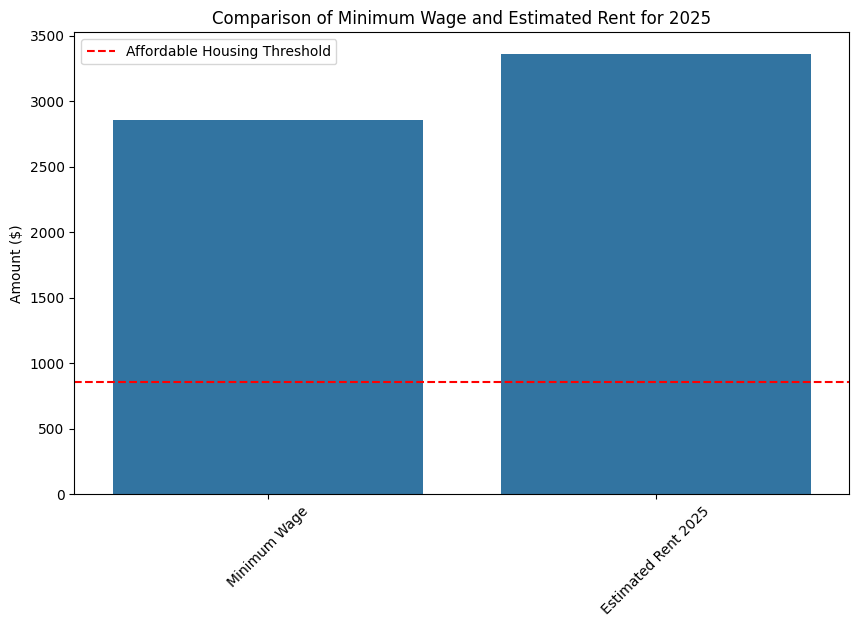

In [67]:
# How many people can afford to pay rent in 2025?
#comparison of today's minimum wage and the estimated rent for 2025
plt.figure(figsize=(10, 6))
sns.barplot(x=['Minimum Wage', 'Estimated Rent 2025'], y=[min_wage_per_month, housing_df['estimated_rent_2025_recent'].mean()])
plt.title('Comparison of Minimum Wage and Estimated Rent for 2025')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.axhline(y=affordable_housing_threshold, color='red', linestyle='--', label='Affordable Housing Threshold')
plt.legend()
plt.show()

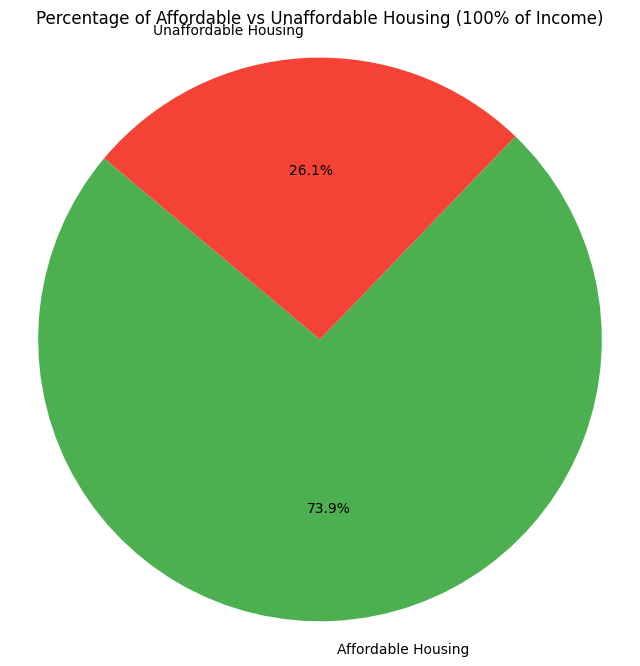

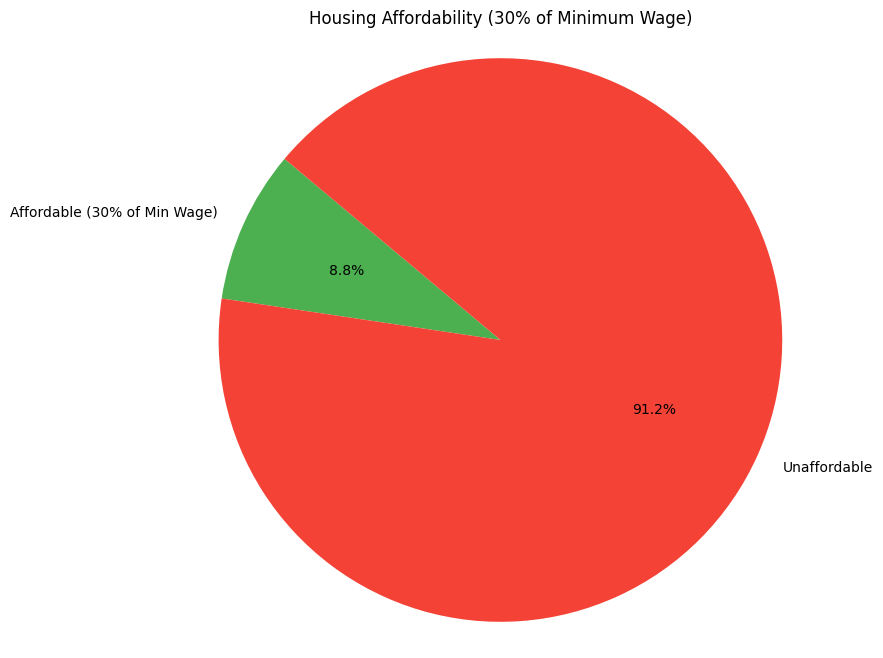

In [68]:
#pie chart of the percentage of housing that is affordable according to today's minimum wage per month
affordable_housing_count = housing_df[housing_df['estimated_monthly_rent'] <= min_wage_per_month].shape[0]
total_housing_count = housing_df.shape[0]
affordable_housing_percentage = (affordable_housing_count / total_housing_count) * 100
unaffordable_housing_percentage = 100 - affordable_housing_percentage
plt.figure(figsize=(8, 8))
plt.pie([affordable_housing_percentage, unaffordable_housing_percentage], 
        labels=['Affordable Housing', 'Unaffordable Housing'], 
        autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#F44336'])
plt.title('Percentage of Affordable vs Unaffordable Housing (100% of Income)')
plt.axis('equal')
plt.show()

#pie chart of the percentage of housing that is affordable according to calculations of 30% of the minimum wage
plt.figure(figsize=(8, 8))
# Calculate affordable housing count using 30% of minimum wage threshold
affordable_30pct = housing_df[housing_df['estimated_monthly_rent'] <= affordable_housing_threshold].shape[0]
unaffordable_30pct = total_housing_count - affordable_30pct
affordable_30pct_percentage = (affordable_30pct / total_housing_count) * 100
unaffordable_30pct_percentage = 100 - affordable_30pct_percentage

plt.pie([affordable_30pct_percentage, unaffordable_30pct_percentage],
    labels=['Affordable (30% of Min Wage)', 'Unaffordable'],
    autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#F44336'])
plt.title('Housing Affordability (30% of Minimum Wage)')
plt.axis('equal')
plt.show()




 



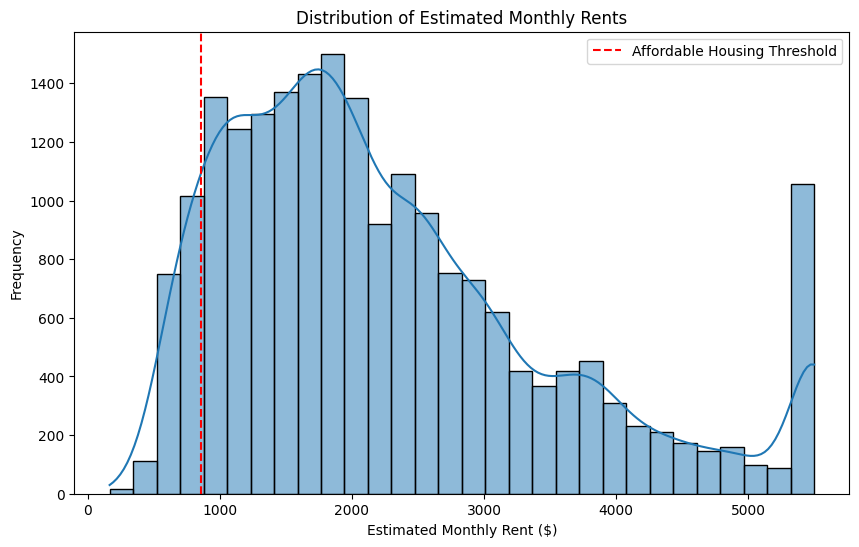

In [69]:
# Visualize the distribution of estimated monthly rents
plt.figure(figsize=(10, 6))
sns.histplot(housing_df['estimated_monthly_rent'], bins=30, kde=True)
plt.title('Distribution of Estimated Monthly Rents')
plt.xlabel('Estimated Monthly Rent ($)')
plt.ylabel('Frequency')
plt.axvline(affordable_housing_threshold, color='red', linestyle='--', label='Affordable Housing Threshold')
plt.legend()
plt.show()

In [ ]:
# Calculate affordability by ocean proximity
affordable_housing_by_region = housing_df.groupby('ocean_proximity')['estimated_monthly_rent'].apply(lambda x: (x <= affordable_housing_threshold).sum())
# Display the affordable housing counts by region
print("Affordable housing counts by region:")
print(affordable_housing_by_region.sort_values(ascending=False))


In [70]:
# Is there a relationship between distance from the ocean and housing affordability?

In [71]:
# What types of housing areas are most likely to be affordable?